PROGETTO: CREAZIONE DI UNA RETE NEURALE OCR IN GRADO DI FARE UNA DETECTION SU TARGHE DI AUTOVEICOLI.

In [1]:
#Import delle varie librerie.
import pandas as pd     #libreria per manipolazione e analisi dei dati
import numpy as np      #libreria per array multidimensionali nparray
import matplotlib.pyplot as plt   #libreria per fare i plot(grafici)
import matplotlib.patches as pat
import cv2    #libreria per la computer vision
import os     #libreria per lavorare con il sistema operativo
import glob   #libreria per ricercare file sui paths.
from IPython.display import Image, display
import xml.etree.ElementTree as etree #libreria per scorrere i file xml
import copy as cp #libreria per copiare le immagini



In [2]:
#IPERPARAMETRI DEL PROGETTO
LISTA_IMMAGINI = [] #lista che contiene tutte le immagini del dataset
SIZE_IMMAGINE = 300 #ovvero è una 300x300, parametro per il ridimensionamento
LISTA_LABEL = [] #lista che contiene tutti i file xml delle dataset
LISTA_IMMAGINI_CON_LABEL =[] #lista che contiene le immagini con SIZE_IMMAGINE e il loro rispettivo LABEL disegnato. tipo numpy


PREPARAZIONE DEL DATI, OVVERO PREPROCESSING, BISOGNA AVERE LE IMMAGINI DELLA STESSA DIMENSIONE. (NON SERVE DATA AGGREGATION PERCHE' SONO ABBASTANZA I DATI DISPONIBILI ALL'INTERNO DI QUESTO DATASET)

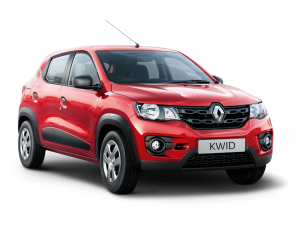

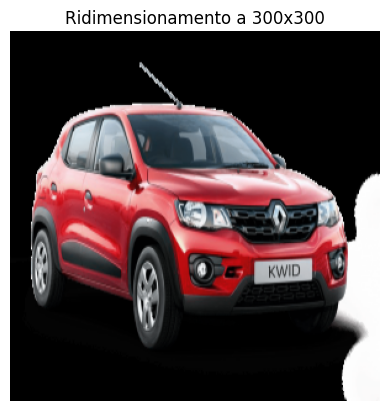

In [3]:
#path della cartella delle immagini
cartella_immagine = 'Dataset\images'
#crea il path dei dati facendo un join tra il path della cartella che contiene l'immagini e finiscono con *g quindi tutte quelle in formato png
data_path = os.path.join(cartella_immagine,'*g')
#La funzione glob mi restituisce una lista di file contentete quel path, quindi tutte le immagini png
files_immagini = glob.glob(data_path)
#si ordinano in ordine alfabetico per farle matchare con il rispettivo file xml, che contiene la label delle varie targhe
files_immagini.sort()
#contiene tutte le immagini in formato png con il nuovo size
for file in files_immagini:
    immagine = cv2.imread(file)
    immagine = cv2.resize(immagine, (SIZE_IMMAGINE,SIZE_IMMAGINE))
    #perché cv2 di default con il imread mi inverte i colori
    immagine_rgb = cv2.cvtColor(immagine, cv2.COLOR_BGR2RGB)
    LISTA_IMMAGINI.append(immagine_rgb)
    
#Per far vedere le dimensioni originali dell'immagine 116 all'interno del database confrontata con la medesima ma a dimensione 300x300
display(Image(files_immagini[116]))
plt.imshow(LISTA_IMMAGINI[116])
plt.axis('off')  # Turn off axis labels
plt.title("Ridimensionamento a 300x300")
plt.show()


ORA AVENDO NEL DATABASE ANCHE i FILE XML DELLE RISPETTIVE IMMAGINI CHE MI DANNO LE COORDINATE (xmin,xmax,ymin,ymax) DELLE LABEL DELLE TARGHE, DEVO A SUA VOLTA RIDIMENSIONARLE IN BASE ALLA SIZE_IMMAGINE.

In [4]:
def ridimensionamento_file_xml(file):
    albero = etree.parse(file)
    root = albero.getroot()
    #dimensione dell'immagine in xml
    dimensione  = root.find('size')
    larghezza = dimensione.find('width').text
    altezza = dimensione.find('height').text
    
    dimensione_coordinate = root.find('object').find('bndbox')
    larghezza,altezza = int(larghezza),int(altezza)
    xmin,ymin,xmax,ymax = int(dimensione_coordinate.find('xmin').text), int(dimensione_coordinate.find('ymin').text), int(dimensione_coordinate.find('xmax').text), int(dimensione_coordinate.find('ymax').text)
    
    xmin, ymin = xmin/(larghezza/SIZE_IMMAGINE), ymin/(altezza/SIZE_IMMAGINE)
    
    xmax, ymax = xmax/(larghezza/SIZE_IMMAGINE), ymax/(altezza/SIZE_IMMAGINE)
    
    return (int(xmin),int(ymin),int(xmax),int(ymax))

#Inizio a scorrere i file xml all'interno del dataset\annotations 
cartella_annotations = 'Dataset\\annotations'
xml_path = os.path.join(cartella_annotations,'*l')
files_xml = glob.glob(xml_path)
files_xml.sort()
for file_xml in files_xml:
    LISTA_LABEL.append(ridimensionamento_file_xml(file_xml))

#TEST FUNZIONE ridimensionamento_file_xml    
file = open('Dataset\\annotations\\Cars0.xml','r')
xmin,ymin,xmax,ymax = ridimensionamento_file_xml(file)
print(xmin,ymin,xmax,ymax)

print(LISTA_LABEL[0][0],LISTA_LABEL[0][1])


135 139 251 193
135 139


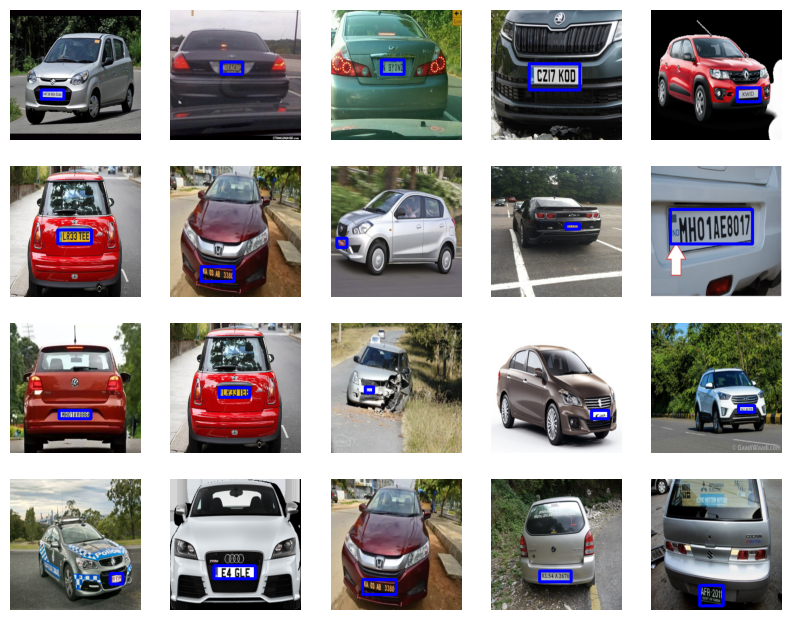

In [16]:
#ORA RIDISEGNO IL RETTANGOLO PER OGNI IMMAGINE CHE MI INDIVIDUA LA TARGA
i=0
for file in LISTA_IMMAGINI:
    xmin_i,ymin_i,xmax_i,ymax_i = LISTA_LABEL[i][0],LISTA_LABEL[i][1],LISTA_LABEL[i][2],LISTA_LABEL[i][3]
    immagine_con_rettangolo = cp.deepcopy(file)
    cv2.rectangle(immagine_con_rettangolo,(xmin_i,ymin_i),(xmax_i,ymax_i),(0,0,255),5)
    LISTA_IMMAGINI_CON_LABEL.append(immagine_con_rettangolo)
    i=i+1

#un subplot della 100-esima immagine fino alla 120-esima.
plt.figure(figsize=(10,20))
for i in range(0,20) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(LISTA_IMMAGINI_CON_LABEL[120-i])

    